In [2]:
!pip install catboost


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\Marwa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

from scipy.stats import moment, skew, kurtosis


from joblib import load

# Reading and filtering data

Files from the dataset have data about the sensor in the first 3 lines, we will skip these lines.

In [4]:
def skip_fun(x):
    return x in (0, 1, 2)

Load the dataset and rename the columns for convenience

In [5]:
data_path = "./data/fight_file/14.txt"
data = pd.read_csv(data_path, skiprows=skip_fun)

data.rename(columns={"Time (s)": "Time",
                      " X (m/s2)": "X",
                      " Y (m/s2)": "Y",
                      " Z (m/s2)": "Z",
                      " R (m/s2)": "R",
                      " Theta (deg)": "Theta",
                      " Phi (deg)": "Phi",}, inplace=True)

data

,Time,X,Y,Z,R,Theta,Phi
0,0.000000,-2.634826,9.373040,1.114909,9.799959,83.467506,105.701035
1,0.002363,-2.388234,9.418529,1.004781,9.768414,84.096107,104.228462
2,0.004723,-2.151218,9.478380,0.954504,9.766192,84.391212,102.787254
3,0.007085,-2.120094,9.528656,0.990416,9.811779,84.206612,102.543793
4,0.009445,-2.163188,9.552597,1.057451,9.851380,83.837982,102.759453
...,...,...,...,...,...,...,...
17743,42.088100,-1.607757,7.716323,6.326862,10.107211,51.246212,101.769646
17744,42.090511,-1.638881,7.666048,5.445834,9.545224,55.212830,102.067284
17745,42.092922,-1.696339,7.622953,5.347675,9.464915,55.597721,102.545631
17746,42.095333,-1.648457,7.713930,6.027600,9.927441,52.615170,102.062599


Text(0.5, 0, 'Time (Seconds)')

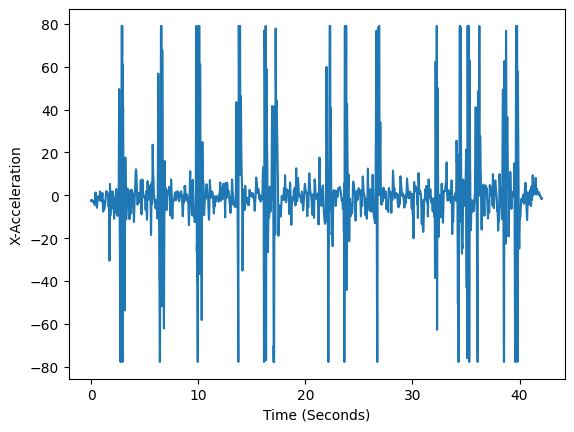

In [6]:
plt.plot(data["Time"], data["X"])
plt.ylabel("X-Acceleration")
plt.xlabel("Time (Seconds)")

In [7]:
data

#this is for the jab index file 14 which we input


jab_ind = [9, 10, 11, 22, 23, 24, 34, 35, 36, 77, 78, 79, 119, 120, 121]

uppercut_ind = [56, 57, 58, 82, 83, 84, 112, 113, 114, 123, 124, 138, 139, 140]
                
hook_ind = [47, 48, 49, 59, 60, 61, 93, 94, 95, 126, 127, 135, 136]

data

,Time,X,Y,Z,R,Theta,Phi
0,0.000000,-2.634826,9.373040,1.114909,9.799959,83.467506,105.701035
1,0.002363,-2.388234,9.418529,1.004781,9.768414,84.096107,104.228462
2,0.004723,-2.151218,9.478380,0.954504,9.766192,84.391212,102.787254
3,0.007085,-2.120094,9.528656,0.990416,9.811779,84.206612,102.543793
4,0.009445,-2.163188,9.552597,1.057451,9.851380,83.837982,102.759453
...,...,...,...,...,...,...,...
17743,42.088100,-1.607757,7.716323,6.326862,10.107211,51.246212,101.769646
17744,42.090511,-1.638881,7.666048,5.445834,9.545224,55.212830,102.067284
17745,42.092922,-1.696339,7.622953,5.347675,9.464915,55.597721,102.545631
17746,42.095333,-1.648457,7.713930,6.027600,9.927441,52.615170,102.062599


In [8]:
#Now we preprocess the data with the given action index
data 

,Time,X,Y,Z,R,Theta,Phi
0,0.000000,-2.634826,9.373040,1.114909,9.799959,83.467506,105.701035
1,0.002363,-2.388234,9.418529,1.004781,9.768414,84.096107,104.228462
2,0.004723,-2.151218,9.478380,0.954504,9.766192,84.391212,102.787254
3,0.007085,-2.120094,9.528656,0.990416,9.811779,84.206612,102.543793
4,0.009445,-2.163188,9.552597,1.057451,9.851380,83.837982,102.759453
...,...,...,...,...,...,...,...
17743,42.088100,-1.607757,7.716323,6.326862,10.107211,51.246212,101.769646
17744,42.090511,-1.638881,7.666048,5.445834,9.545224,55.212830,102.067284
17745,42.092922,-1.696339,7.622953,5.347675,9.464915,55.597721,102.545631
17746,42.095333,-1.648457,7.713930,6.027600,9.927441,52.615170,102.062599


In [9]:
jab_1 = (data[data.Time >= 9])[data.Time <= 10]

C:\Users\Marwa\AppData\Local\Temp\ipykernel_24332\2708231620.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jab_1 = (data[data.Time >= 9])[data.Time <= 10]


In [10]:
jab_2 = (data[data.Time >= 10])[data.Time <= 11]

C:\Users\Marwa\AppData\Local\Temp\ipykernel_24332\3528984513.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jab_2 = (data[data.Time >= 10])[data.Time <= 11]


In [11]:
#This function will determine the splicing 
exp_data = data["Time"].isin([10.000697])
exp_data = data.loc[4216] #Filter by row
exp_data 

Time      10.000697
X        -14.246205
Y        -74.042152
Z        -70.597923
R        103.292122
Theta    133.116058
Phi      259.109009
Name: 4216, dtype: float64

In [12]:
exp_data = data.loc[[4216, 4217]]
exp_data

,Time,X,Y,Z,R,Theta,Phi
4216,10.000697,-14.246205,-74.042152,-70.597923,103.292122,133.116058,259.109009
4217,10.003106,-7.308106,-70.376785,-65.400337,96.350945,132.747772,264.071503


In [13]:
data

,Time,X,Y,Z,R,Theta,Phi
0,0.000000,-2.634826,9.373040,1.114909,9.799959,83.467506,105.701035
1,0.002363,-2.388234,9.418529,1.004781,9.768414,84.096107,104.228462
2,0.004723,-2.151218,9.478380,0.954504,9.766192,84.391212,102.787254
3,0.007085,-2.120094,9.528656,0.990416,9.811779,84.206612,102.543793
4,0.009445,-2.163188,9.552597,1.057451,9.851380,83.837982,102.759453
...,...,...,...,...,...,...,...
17743,42.088100,-1.607757,7.716323,6.326862,10.107211,51.246212,101.769646
17744,42.090511,-1.638881,7.666048,5.445834,9.545224,55.212830,102.067284
17745,42.092922,-1.696339,7.622953,5.347675,9.464915,55.597721,102.545631
17746,42.095333,-1.648457,7.713930,6.027600,9.927441,52.615170,102.062599


In [14]:
#Now we preprocess the data with the given action index
data["action"]

,Time,X,Y,Z,R,Theta,Phi
0,0.000000,-2.634826,9.373040,1.114909,9.799959,83.467506,105.701035
1,0.002363,-2.388234,9.418529,1.004781,9.768414,84.096107,104.228462
2,0.004723,-2.151218,9.478380,0.954504,9.766192,84.391212,102.787254
3,0.007085,-2.120094,9.528656,0.990416,9.811779,84.206612,102.543793
4,0.009445,-2.163188,9.552597,1.057451,9.851380,83.837982,102.759453
...,...,...,...,...,...,...,...
17743,42.088100,-1.607757,7.716323,6.326862,10.107211,51.246212,101.769646
17744,42.090511,-1.638881,7.666048,5.445834,9.545224,55.212830,102.067284
17745,42.092922,-1.696339,7.622953,5.347675,9.464915,55.597721,102.545631
17746,42.095333,-1.648457,7.713930,6.027600,9.927441,52.615170,102.062599


In [ ]:
#Let's work on doing some preprocessing to get the data file for Train M
data_train_M = pd.read_csv("./data/")